In [7]:
import numpy as np

In [8]:
#Make a wheel controller based on the keyboard input w,a,s,d:
# w - forward
# s - backward
# a - left
# d - right

def wheel_controller(input):
    #Input: w,a,s,d
    #Output: wheel control
    if(input == 'w'):
        return([1,1, 0])
    elif(input == 's'):
        return([-1,-1, 0])
    elif(input == 'a'):
        return([-1,1, -np.pi/2])
    elif(input == 'd'):
        return([1,-1, np.pi/2])
    else:
        return([0,0,0])

        




In [9]:
def robot_walk(control_commands):
    [x,y] = [0,0]
    orientation = 0
    commands = control_commands
    #robot positions:
    pos = []

    while(commands != ""):
        dt = 0.5
        input = commands[0]
        [dx,dy, dtheta] = wheel_controller(input)
        orientation = orientation + dtheta
        v = (dx+dy)/2
        [x,y] = [x+dt*v*np.sin(orientation) ,y+dt*v*np.cos(orientation)]
        commands = commands[1:]
        pos.append([x,y])
    return(pos)

In [19]:
def wall_regions(wall1, wall2):
    #Check if the robot collides with the wall
    #pos - robot positions
    #wall1, wall2 - wall coordinates
    
    #Walled Regions:
    walled_regions = []
    for i in range(min(len(wall1),len(wall2))-1):
        [xl1,yl1] = wall1[i]
        [xr1,yr1] = wall2[i]
        [xl2,yl2] = wall1[i+1]
        [xr2,yr2] = wall2[i+1]
        xw0 = min(xl1,xr1,xl2,xr2)
        xw1 = max(xl1,xr1,xl2,xr2)
        yw0 = min(yl1,yr1,yl2,yr2)
        yw1 = max(yl1,yr1,yl2,yr2)
        walled_regions.append([[xw0,yw0],[xw1,yw1]])

    return walled_regions

def check_collision(pos, wallreg):    
    collision = False
    col_x = 0
    col_y = 0
    for i in range(len(pos)):
        [x,y] = pos[i]
        collision = True
        col_x = x
        col_y = y
        for j in range(len(wallreg)):
            [xw0,yw0] = wallreg[j][0]
            [xw1,yw1] = wallreg[j][1]
            if(xw0 <= x <= xw1 and yw0 <= y <= yw1):
                collision = False
                break
        if(collision):
            break
    return(collision, col_x, col_y, i)

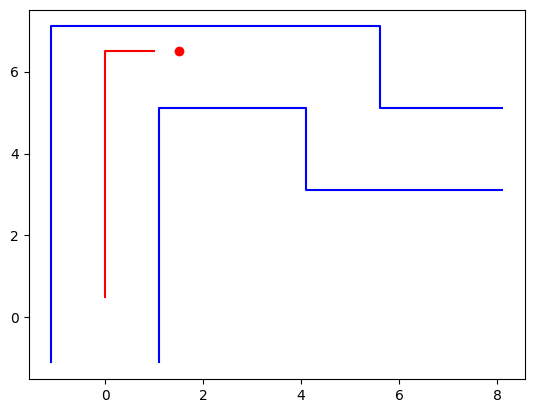

In [21]:
import matplotlib.pyplot as plt

wall_1_coords = [[-1.1,-1.1],[-1.1,7.1],[5.6,7.1],[5.6,5.1],[8.1,5.1]]
wall_2_coords = [[1.1,-1.1],[1.1,5.1],[4.1,5.1],[4.1,3.1],[8.1,3.1]]

#plot the walls
plt.plot([x[0] for x in wall_1_coords],[x[1] for x in wall_1_coords],'b')
plt.plot([x[0] for x in wall_2_coords],[x[1] for x in wall_2_coords],'b')
control_commands = "wwwwwwwwwwwwwdwwwwwwwwwwwwwwwwwwwwdwwwwawwwwww"
pos = robot_walk(control_commands)

#plot the robot
wallreg = wall_regions(wall_1_coords, wall_2_coords)
check_col = False
check_col, col_x, col_y, col_index = check_collision(pos, wallreg)
if(check_col):
    pos = pos[:col_index]
    plt.plot(col_x, col_y, 'ro')
    
plt.plot([x[0] for x in pos],[x[1] for x in pos],'r')
plt.show()